# Notas de aula: Mecânica Quântica, Autor: Jonas Maziero

Links para os vídeos da aulas sobre esse tópico: https://youtu.be/IGS1N1bEu8U e https://youtu.be/fZnf471dRG8.

In [1]:
%run init.ipynb

# Potencial Barreira
Para a barreira de potencial, podemos escrever a função energia potencial como:
\begin{cases}
U(x<0)=0, \\
U(0<x<a)=U_{0}=\text{constante}, \\
U(x>a)=0.
\end{cases}
As soluções da equação de Schrödinher, que, para as três regiões, pode ser escrita na forma 
\begin{equation}
\partial_{xx}\Xi(x)+k^{2}\Xi(x)=0,
\end{equation}
são obtidas como no caso do potencial dregrau. 

## $E<U_{0}$
Nesse caso as soluções da EqSIT1D podem ser escritas na forma
\begin{cases}
\Xi_{e}(x<0) = c_{ed}e^{ik_{e}x} + c_{ee}e^{-ik_{e}x}, \\
\Xi_{b}(0<x<a) = c_{bd}e^{-k_{b}x} + c_{bc}e^{k_{b}x}, \\
\Xi_{d}(x>a) = c_{dd}e^{ik_{e}x} + c_{de}e^{-ik_{e}x},
\end{cases}
com
\begin{equation}
k_{e}=\frac{\sqrt{2mE}}{\hbar} \text{ e } k_{b}=\frac{\sqrt{2m(U_{0}-E)}}{\hbar}.
\end{equation}
Assim
\begin{equation}
\frac{k_{b}}{k_{e}} = \frac{\sqrt{2m(U_{0}-E)}}{\sqrt{2mE}} \therefore k_{b} = k_{e}\sqrt{\frac{U_{0}}{E}-1}.
\end{equation}
OBS. Aqui não usarei o til para diferenciar os dois casos.

Novamente, $c_{ed}$ determina o fluxo de quantons incidindo na barreira de potencial e consideramos que os quantons movem-se inicialmente na região $x<0$ da esquerda para a direita. Pontanto, se o quanton passou para a região $x>a$ não há motivo para este retornar, então
\begin{equation}
c_{de} := 0.
\end{equation}

As outras constantes, $c_{ee},c_{bd},c_{ba},c_{dd}$, são determinadas, em termos de $c_{ed}$, impondo a continuidade da função de onda e de sua primeira derivada. Usando
\begin{cases}
\partial_{x}\Xi_{e} = ik_{e}\left(c_{ed}e^{ik_{e}x}-c_{ee}e^{-ik_{e}x}\right), \\
\partial_{x}\Xi_{b} = -k_{b}\left(c_{bd}e^{-k_{b}x}-c_{bc}e^{k_{b}x}\right), \\
\partial_{x}\Xi_{d} = ik_{e}c_{dd}e^{ik_{e}x},
\end{cases}
teremos
\begin{align}
\Xi_{e}(x=0) = \Xi_{b}(x=0) & \\
& \therefore c_{ed}+c_{ee}=c_{bd}+c_{bc} \therefore -c_{ee}+c_{bd}+c_{bc}+0c_{dd}=c_{ed}, \\
\Xi_{b}(x=a) = \Xi_{d}(x=a) & \\ 
& \therefore c_{bd}e^{-k_{b}a}+c_{bc}e^{k_{b}a}=c_{dd}e^{ik_{e}a} \therefore 0c_{ee}+e^{-k_{b}a}c_{bd}+e^{k_{b}a}c_{bc}-e^{ik_{e}a}c_{dd}=0, \\
\partial_{x}\Xi_{e}(x=0)=\partial_{x}\Xi_{b}(x=0) & \\ 
& \therefore ik_{e}(c_{ed}-c_{ee})=-k_{b}(c_{bd}-c_{bc}) \therefore ik_{e}c_{ee}-k_{b}c_{bd}+k_{b}c_{bc}+0c_{dd}=ik_{e}c_{ed}, \\
\partial_{x}\Xi_{e}(x=a)=\partial_{x}\Xi_{b}(x=a) & \\ 
& \therefore -k_{b}\left(c_{bd}e^{-k_{b}a}-c_{bc}e^{k_{b}a}\right) = ik_{e}c_{dd}e^{ik_{e}a} \therefore 0c_{ee}-k_{b}e^{-k_{b}a}c_{bd}+k_{b}e^{k_{b}a}c_{bc}-ik_{e}e^{ik_{e}a}c_{dd}=0.
\end{align}
Ou, na forma matricial,
\begin{equation}
\begin{bmatrix} -1&1&1&0 \\ 0&e^{-k_{b}a}&e^{k_{b}a}&-e^{ik_{e}a} \\ ik_{e}&-k_{b}&k_{b}&0 \\ 0&-k_{b}e^{-k_{b}a}&k_{b}e^{k_{b}a}&-ik_{e}e^{ik_{e}a} \end{bmatrix}\begin{bmatrix} c_{ee}\\c_{bd}\\c_{bc}\\c_{dd}\end{bmatrix}=\begin{bmatrix} c_{ed} \\ 0 \\ ik_{e}c_{ed} \\ 0\end{bmatrix}\text{ ou } A|x\rangle=|y\rangle.
\end{equation}
Se $\det(A)\ne 0$, a inversa de $A$ existe e a solução desse sistema de equações lineares não homogêneo é
\begin{equation}
|x\rangle=A^{-1}|y\rangle \text{, com } (A^{-1})_{j,k}=\frac{(-1)^{k+j}\det(A^{(k,j)})}{\det(A)}
\end{equation}
(veja https://github.com/jonasmaziero/algebra_linear/blob/master/01_determinant.ipynb). No entanto, essas contas são muito longas para os propósitos dessa disciplina, e por isso usaremos os resultados obtidos com o Sympy, como mostrado abaixo.

In [2]:
a, ke, kb, ced, cee, cbd, cbc, cdd = symbols('a k_{e} k_{b} c_{ed} c_{ee} c_{bd} c_{bc} c_{dd}')
A = Matrix([[-1,1,1,0],[0,exp(-kb*a),exp(kb*a),-exp(1j*ke*a)],[1j*ke,-kb,kb,0],
            [0,-kb*exp(-kb*a),kb*exp(kb*a),-1j*ke*exp(1j*ke*a)]])#; A

In [3]:
Am1 = A.inv()#; simplify(Am1)

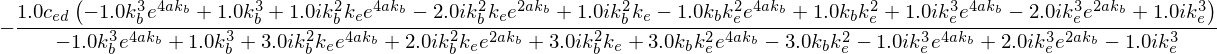

In [4]:
cee = Am1[0,0]*ced + 0 + Am1[0,2]*1j*ke*ced + 0; simplify(cee)

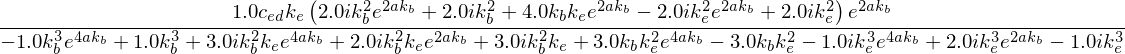

In [5]:
cbd = Am1[1,0]*ced + 0 + Am1[1,2]*1j*ke*ced + 0; simplify(cbd)

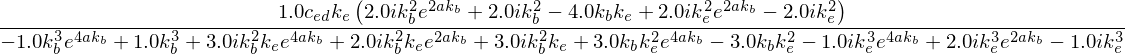

In [6]:
cbc = Am1[2,0]*ced + 0 + Am1[2,2]*1j*ke*ced + 0; simplify(cbc)

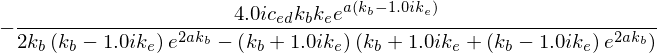

In [7]:
cdd = Am1[3,0]*ced + 0 + Am1[3,2]*1j*ke*ced + 0; simplify(cdd)

## Densidade de probabilidade
Assumiremos $c_{ed}\in\mathbb{R}$. Usando as expressões obtidas acima para os coeficientes das funções de onda, obteremos à esquerda da barreira:
\begin{align}
|\Xi_{e}|^{2} & = \Xi_{e}\Xi_{e}^{*} = \left(c_{ed}e^{ik_{e}x}+c_{ee}e^{-ik_{e}x}\right)\left(c_{ed}^{*}e^{-ik_{e}x}+c_{ee}^{*}e^{ik_{e}x}\right) = |c_{ed}|^{2} + c_{ed}c_{ee}^{*}e^{2ik_{e}x} + c_{ee}c_{ed}^{*}e^{-ik_{e}x} + |c_{ee}|^{2} \\
& = |c_{ed}|^{2} + |c_{ee}|^{2} + 2\Re\left(c_{ed}c_{ee}^{*}e^{2ik_{e}x}\right)= c_{ed}^{2} + |c_{ee}|^{2} + 2c_{ed}\left(\Re(c_{ee}^{*})\Re\left(e^{2ik_{e}x}\right)-\Im(c_{ee}^{*})\Im\left(e^{2ik_{e}x}\right)\right) \\
& = c_{ed}^{2} + |c_{ee}|^{2} + 2c_{ed}\left(\Re(c_{ee})\cos(2k_{e}x)+\Im(c_{ee})\sin(2k_{e}x)\right).
\end{align}
Na barreira
\begin{align}
|\Xi_{b}|^{2} & = \Xi_{b}\Xi_{b}^{*} = \left(c_{bd}e^{-k_{b}x}+c_{bc}e^{k_{b}x}\right)\left(c_{bd}^{*}e^{-k_{b}x}+c_{bc}^{*}e^{k_{b}x}\right) = |c_{bd}|^{2}e^{-2k_{b}x} + c_{bd}c_{bc}^{*} + c_{bd}^{*}c_{bc} + |c_{bc}|^{2}e^{2k_{b}x} \\
& = |c_{bd}|^{2}e^{-2k_{b}x} + |c_{bc}|^{2}e^{2k_{b}x} + 2\Re(c_{bd}c_{bc}^{*}) = |c_{bd}|^{2}e^{-2k_{b}x} + |c_{bc}|^{2}e^{2k_{b}x} + 2(\Re(c_{bd})\Re(c_{bc}^{*})-\Im(c_{bd})\Im(c_{bc}^{*})) \\
& = |c_{bd}|^{2}e^{-2k_{b}x} + |c_{bc}|^{2}e^{2k_{b}x} + 2(\Re(c_{bd})\Re(c_{bc})+\Im(c_{bd})\Im(c_{bc})).
\end{align}
À direita da barreira
\begin{align}
|\Xi_{d}|^{2} & = \Xi_{d}\Xi_{d}^{*} = c_{dd}e^{ik_{e}x}c_{dd}^{*}e^{-ik_{e}x} = |c_{dd}|^{2}.
\end{align}

In [11]:
def E_lt_U0(E,a):
    U0 = 0.5; m = 1; ke = math.sqrt(2*m*E); kb = math.sqrt(U0/E-1)*ke; ced = 0.5
    # usando inv
    '''cee = -ced*(-kb**3*math.exp(4*a*kb)+kb**3+1j*kb**2*ke*math.exp(4*a*kb) - 2*1j*kb**2*ke*math.exp(2*a*kb) + 1j*kb**2*ke - kb*ke**2*math.exp(4*a*kb) + kb*ke**2 + 1j*ke**3*math.exp(4*a*kb) - 2*1j*ke**3*math.exp(2*a*kb) + 1j*ke**3)
    den = -kb**3*math.exp(4*a*kb) + kb**3 + 3*1j*kb**2*ke*math.exp(4*a*kb) + 2*1j*kb**2*ke*math.exp(2*a*kb) + 3*1j*kb**2*ke + 3*kb*ke**2*math.exp(4*a*kb) - 3*kb*ke**2 - 1j*ke**3*math.exp(4*a*kb) + 2*1j*ke**3*math.exp(2*a*kb) - 1j*ke**3
    cee /= den#; print(cee)
    cbd = ced*ke*math.exp(2*a*kb)*(2*1j*kb**2*math.exp(2*a*kb) + 2*1j*kb**2 + 4*kb*ke*math.exp(2*a*kb) - 2*1j*ke**2*math.exp(2*a*kb) + 2*1j*ke**2)
    cbd /= den#; print(cbd)
    cbc = ced*ke*(2*1j*kb**2*math.exp(2*a*kb) + 2*1j*kb**2 - 4*kb*ke + 2*1j*ke**2*math.exp(2*a*kb) - 2*1j*ke**2)
    cbc /= den#; print(cbc)
    cdd = -4*1j*ced*kb*ke*math.exp(a*kb)*(math.cos(ke*a)-1j*math.sin(ke*a))
    cdd /= 2*kb*(kb - 1j*ke)*math.exp(2*a*kb) - (kb + 1j*ke)*(kb + 1j*ke + (kb - 1j*ke)*math.exp(2*a*kb))
    #print(cdd)'''
    # usando solve
    den = -1j*kb**2*math.exp(2*a*kb)*math.sin(a*ke) - kb**2*math.exp(2*a*kb)*math.cos(a*ke) + 1j*kb**2*math.sin(a*ke) + kb**2*math.cos(a*ke) - 2*kb*ke*math.exp(2*a*kb)*math.sin(a*ke) + 2*1j*kb*ke*math.exp(2*a*kb)*math.cos(a*ke) - 2*kb*ke*math.sin(a*ke) + 2*1j*kb*ke*math.cos(a*ke) + 1j*ke**2*math.exp(2*a*kb)*math.sin(a*ke) + ke**2*math.exp(2*a*kb)*math.cos(a*ke) - 1j*ke**2*math.sin(a*ke) - ke**2*math.cos(a*ke) 
    #print('den = ',den)
    cee = ced*(1j*kb**2*math.exp(2*a*kb)*math.sin(a*ke) + kb**2*math.exp(2*a*kb)*math.cos(a*ke) - 1j*kb**2*math.sin(a*ke) - kb**2*math.cos(a*ke) + 1j*ke**2*math.exp(2*a*kb)*math.sin(a*ke) + ke**2*math.exp(2*a*kb)*math.cos(a*ke) - 1j*ke**2*math.sin(a*ke) - ke**2*math.cos(a*ke))
    cee /= den#; print('cee = ',cee)
    cbc = 2*ced*ke*(-kb*math.sin(a*ke) + 1j*kb*math.cos(a*ke) - 1j*ke*math.sin(a*ke) - ke*math.cos(a*ke))
    cbc /= den#; print('cbc = ',cbc)
    cbd = 2*1j*ced*ke*(kb*(math.cos(a*ke)+1j*math.sin(a*ke)) + ke*(math.sin(a*ke) - 1j*math.cos(a*ke)))*math.exp(2*a*kb)
    cbd /= den#; print('cbd = ',cbd)
    cdd = 4*1j*ced*kb*ke*math.exp(a*kb)
    cdd /= den#; print('cdd = ',cdd)
    fig = plt.figure(figsize=(15,6)); 
    N = 1000; xmin = -5*math.pi; xmax = -xmin; dx = (xmax-xmin)/N; x = np.zeros(N); y = np.zeros(N)
    for j in range(0,N):
        x[j] = xmin + j*dx
        if x[j] < 0:
            y[j] = ced**2 + (cee.real)**2 + (cee.imag)**2 + 2*ced*((cee.real)*math.cos(2*ke*x[j])+(cee.imag)*math.sin(2*ke*x[j]))
        elif x[j] > 0 and x[j] < a:
            y[j] = ((cbd.real)**2+(cbd.imag)**2)*math.exp(-2*kb*x[j])+((cbc.real)**2+(cbc.imag)**2)*math.exp(2*kb*x[j])+2*((cbd.real)*(cbc.real)+(cbd.imag)*(cbc.imag))
        elif x[j] > a:
            y[j] = (cdd.real)**2+(cdd.imag)**2
    plt.annotate(r'$E=$'+str(E)[:5], xy=(xmax-8,0.8), xytext=(xmax-8,0.8), fontsize=12)
    plt.plot(x,y); plt.xlabel(r'$x$',fontsize=10); plt.ylabel(r'$|\Xi|^{2}$',fontsize=15)
    plt.annotate(r'$a=$'+str(a)[:4], xy=(a,0), xytext=(a,0), fontsize=12)
    #plt.legend(r'$|\Xi|^{2}$',loc=(1.01,0.2))
    plt.xlim(xmin,xmax); plt.ylim(0,1)
    plt.annotate("", xy=(0,0), xytext=(0,U0), arrowprops=dict(arrowstyle="-"))
    plt.annotate("", xy=(a,0), xytext=(a,U0), arrowprops=dict(arrowstyle="-"))
    plt.annotate("", xy=(0-0.08,U0-0.005), xytext=(a+0.08,U0-0.005), arrowprops=dict(arrowstyle="-"))
    plt.show()
interactive(E_lt_U0, E=(0+10**-3,0.5-10**-3,0.01), a=(0.1,10,0.1))

interactive(children=(FloatSlider(value=0.241, description='E', max=0.499, min=0.001, step=0.01), FloatSlider(…

OBS. O limite de $a$ "muito" grande fornece o mesmo comportamento do potencial degrau. <br>

## Tunelamento quântico
No caso da barreira de potencial, como quantons podem ser refletidos tanto em $x=0$ quanto em $x=a$, iniciaremos calculando o coeficiente de transmissão, que é dado por:
\begin{equation}
T:=\frac{|c_{dd}|^{2}}{|c_{ed}|^{2}},
\end{equation}
uma vez que a velocidade é a mesma, $\omega/k_{e}$, nas regiões $x<0$ e $x>a$. Simplificando,
\begin{align}
c_{dd} & = \frac{-ic_{ed}4k_{e}k_{b}e^{k_{b}a}e^{-ik_{e}a}}{2k_{b}(k_{b}-ik_{e})e^{2k_{b}a}-(k_{b}+ik_{e})(k_{b}+ik_{e}+(k_{b}-ik_{e})e^{2k_{b}a})} \\
& = \frac{-ic_{ed}4k_{e}k_{b}e^{k_{b}a}e^{-ik_{e}a}} {2(k_{b}^{2}-ik_{b}k_{e})e^{2k_{b}a}-k_{b}^{2}-2ik_{b}k_{e}+k_{e}^{2}-(k_{b}^{2}+k_{e}^{2})e^{2k_{b}a}} \\
& = \frac{-ic_{ed}4k_{e}k_{b}e^{k_{b}a}e^{-ik_{e}a}} {(2k_{b}^{2}-k_{b}^{2}-k_{e}^{2})e^{2k_{b}a}-k_{b}^{2}+k_{e}^{2}-2ik_{b}k_{e}(e^{2k_{b}a}+1)}\frac{e^{-k_{b}a}}{e^{-k_{b}a}} \\
& = \frac{-ic_{ed}4k_{e}k_{b}e^{-ik_{e}a}} {(k_{b}^{2}-k_{e}^{2})e^{k_{b}a}-(k_{b}^{2}-k_{e}^{2})e^{-k_{b}a}-2ik_{b}k_{e}(e^{k_{b}a}+e^{-k_{b}a})}\frac{1/4k_{b}k_{e}}{1/4k_{b}k_{e}} \\
& = \frac{-ic_{ed}e^{-ik_{e}a}} {\frac{k_{b}^{2}-k_{e}^{2}}{2k_{b}k_{e}}\frac{e^{k_{b}a}-e^{-k_{b}a}}{2}-i\frac{e^{k_{b}a}+e^{-k_{b}a}}{2}} \\
& = \frac{-ie^{-ik_{e}a}} {\frac{k_{b}^{2}-k_{e}^{2}}{2k_{b}k_{e}}\sinh(k_{b}a)-i\cosh(k_{b}a)}c_{ed}.
\end{align}

Segue assim que
\begin{align}
T & = \frac{1} {\frac{(k_{b}^{2}-k_{e}^{2})^{2}}{4k_{b}^{2}k_{e}^{2}}\sinh^{2}(k_{b}a)+\cosh^{2}(k_{b}a)} = \frac{4k_{b}^{2}k_{e}^{2}} {(k_{b}^{4}+k_{e}^{4}-2k_{b}^{2}k_{e}^{2})\sinh^{2}(k_{b}a)+4k_{b}^{2}k_{e}^{2}\cosh^{2}(k_{b}a)} \\
& = \frac{4k_{b}^{2}k_{e}^{2}} {(k_{b}^{4}+k_{e}^{4}+2k_{b}^{2}k_{e}^{2})\sinh^{2}(k_{b}a)+4k_{b}^{2}k_{e}^{2}(\cosh^{2}(k_{b}a)-\sinh^{2}(k_{b}a))} \\
& = \frac{1} {\frac{(k_{b}^{2}+k_{e}^{2})^{2}}{4k_{b}^{2}k_{e}^{2}}\sinh^{2}(k_{b}a)+1}.
\end{align}
Como 
\begin{align}
& \frac{(k_{b}^{2}+k_{e}^{2})^{2}}{k_{b}^{2}k_{e}^{2}} = \frac{(2m(U_{0}-E)+2mE)^{2}}{2m(U_{0}-E)2mE} = \frac{U_{0}^{2}}{E(U_{0}-E)} = \frac{1}{\frac{E}{U_{0}}\left(1-\frac{E}{U_{0}}\right)}.
\end{align}
obteremos, finalmente, que
\begin{equation}
T = \left(\frac{\sinh^{2}\left(ak_{e}\sqrt{\frac{U_{0}}{E}-1}\right)}{4\frac{E}{U_{0}}\left(1-\frac{E}{U_{0}}\right)}+1\right)^{-1}.
\end{equation}

In [12]:
def EltU0(a):
    fig = plt.figure(figsize=(8,5)); U0 = 1; m = 1; hbb = 1
    x = np.arange(0.01,0.999,0.005); ke = np.sqrt(2*m*x)/hbb; kb = np.sqrt((U0/x)-1)*ke
    T = 1/(1+((np.sinh(kb*a)**2)*((kb**2+ke**2)**2/(4*kb**2*ke**2)))); R = 1-T
    plt.plot(x,R); plt.plot(x,T); plt.xlim(0,1); plt.ylim(-0.01,1.01)
    plt.xlabel(r'$E/U_{0}$'); plt.legend((r'$R$',r'$T$'),loc=(1.01,0.5))
    plt.annotate(r'$a=$'+str(a)[:5], xy=(0.8,0.9), xytext=(0.8,0.9), fontsize=12)
    plt.show()
interactive(EltU0, a=(0.05,4,0.1))

interactive(children=(FloatSlider(value=1.9500000000000002, description='a', max=4.0, min=0.05), Output()), _d…

### Aplicações
Vemos assim que, ao contrário do regime clássico, no regime quântico um quanton pode, mesmo tendo energia menor do que a altura da barreira, passar para o outro lado. Esse fenômeno é o chamado de __tunelamento quântico__. O tunelamendo quântico, assim como vários outros fenômenos quânticos, podem ser pensados como sendo cosequência do aspecto ondulatório dos quantons. No caso do tunelamento quântico, existe um fenômeno ondulatório clássico análogo, que é a chamada __reflexão interna total frustrada__.

O tunelamento quântico possui muitas aplicações físicas e tecnológicas: O funcionamento do _olfato_ envolve, em parte, o tunelamento quântico [https://www.ted.com/talks/luca_turin_the_science_of_scent?utm_campaign=tedspread&utm_medium=referral&utm_source=tedcomshare], que tem associado um _espectroscópio_ para medida de frequências de vibrações moleculares. Esse fenômeno também tem outras aplicações tecnológicas importantes tais como o _microscópio de varredura por tunelamento_ [https://www.nobelprize.org/prizes/physics/1986/rohrer/lecture/], o _diodo túnel_ [https://www.nobelprize.org/prizes/physics/1973/esaki/lecture/], as _juncões Josephson_ [https://www.nobelprize.org/prizes/physics/1973/josephson/lecture/], os _relógios atômicos_ [https://cienciahoje.org.br/coluna/se-nao-fosse-o-relogio-atomico/], etc.

---
# Exercícios

1. Dadas as definições $\sinh(x):=(e^{x}-e^{-x})/2$ e $\cosh(x):=(e^{x}+e^{-x})/2$, verifique que $\cosh^{2}(x)-\sinh^{2}(x)=1$.

1. Uma camada de óxido, em um dispositivo semicondutor, forma uma barreira de $0,6\text{ nm}$ de largura e $9\text{ eV}$ de altura. Para elétrons acelerados com uma ddp de $4\text{ V}$, qual é a fração deles que consegue atravessar a barreira? Qual deveria ser a ddp de aceleração para que o valor de $T$ seja o dobro desse valor?

1. Faça todos os cálculos necessários para obter o coeficiente de trasmissão para $E>U_{0}$, sob as mesmas condições iniciais usadas acima. Faça um gráfico de $T$ e $R$ versus $E/U_{0}$.
---

#### Contas relacionadas ao exercícios

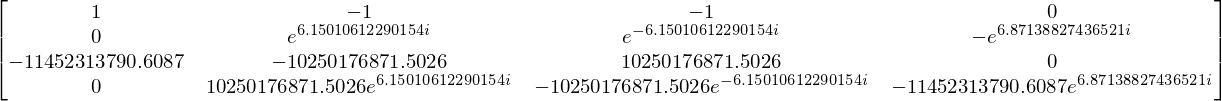

In [16]:
#3
A = Matrix([[1,-1,-1,0],[0,exp(1j*kb*a),exp(-1j*kb*a),-exp(1j*ke*a)],
            [-ke,-kb,kb,0],[0,kb*exp(1j*kb*a),-kb*exp(-1j*kb*a),-ke*exp(1j*ke*a)]])
A

In [17]:
Ainv = A.inv()
cdd = Ainv[3,0]*(-ced) + Ainv[3,2]*(-ke*ced); simplify(cdd)

Coeficiente de transmissão:
\begin{equation}
T = \frac{|c_{dd}|^{2}}{|c_{ed}|^{2}} = \left(1+\frac{(k_{b}^{2}-k_{e}^{2})^{2}}{4k_{b}^{2}k_{e}^{2}}\sin^{2}(k_{b}a)\right)^{-1}.
\end{equation}

In [18]:
def EltU0(a):
    fig = plt.figure(figsize=(8,5)); U0 = 1; m = 1; hbb = 1
    x = np.arange(0.01,0.999,0.005); ke = np.sqrt(2*m*x)/hbb; kb = np.sqrt((U0/x)-1)*ke
    T = 1/(1+((np.sinh(kb*a)**2)*((kb**2+ke**2)**2/(4*kb**2*ke**2)))); R = 1-T
    plt.plot(x,R,color='blue'); plt.plot(x,T,color='red')
    x = np.arange(1.001,12,0.005); ke = np.sqrt(2*m*x)/hbb; kb = np.sqrt(1-U0/x)*ke
    T = 1/(1+(((np.sin(kb*a))**2)*((kb**2-ke**2)**2/(4*kb**2*ke**2)))); R = 1-T
    plt.plot(x,R,color='blue'); plt.plot(x,T,color='red')
    plt.xlim(0,12); plt.ylim(-0.01,1.01)
    plt.xlabel(r'$E/U_{0}$'); plt.legend((r'$R$',r'$T$'),loc=(1.01,0.5))
    plt.annotate(r'$a=$'+str(a)[:5], xy=(10,0.9), xytext=(10,0.9), fontsize=12)
    plt.show()
interactive(EltU0, a=(0.01,5,0.1))

interactive(children=(FloatSlider(value=2.41, description='a', max=5.0, min=0.01), Output()), _dom_classes=('w…